In [1]:
# !pip install pycausalimpact

In [2]:
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats

import math
import datetime
import matplotlib.dates as mdates

from re import sub
from decimal import Decimal
import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from causalimpact import CausalImpact

In [3]:
median_price = pd.read_csv('../data/median_comp_price.csv')

In [4]:
median_price = median_price.drop('date.1', axis = 1 )

# median_price_t = median_price.set_index('date')

median_price_t = median_price.set_index(pd.DatetimeIndex(median_price['date']))
median_price_t.drop('date', axis=1,inplace=True)

In [5]:
# take out the first row with a null value in SF

median_price2 = median_price_t[1:]

median_price2.columns = ["x1","y"]
median_price2 = median_price2[['y', 'x1']]

# impute missing values in the control market.

median_price2['x1'] = median_price2['x1'].fillna(method = 'ffill')
# median_price2['x1_interpolated'] = median_price2['x1'].interpolate(method = 'time')

# only a few missing data points of SF prices in the pre-period

median_price2['y'] = median_price2['y'].fillna(method = 'ffill')
# median_price2['y_interpolated'] = median_price2['y'].interpolate(method = 'time')

median_price2

y         x1
date                             
2015-05-10  120.000000  65.000000
2015-05-17  124.500000  65.000000
2015-05-24  125.000000  65.000000
2015-05-31  120.000000  65.000000
2015-06-07  125.000000  67.000000
2015-06-14  125.000000  68.000000
2015-06-21  125.000000  68.000000
2015-06-28  125.000000  68.000000
2015-07-05  125.000000  68.000000
2015-07-12  125.000000  67.000000
2015-07-19  125.000000  65.000000
2015-07-26  125.000000  65.000000
2015-08-02  124.000000  67.000000
2015-08-09  124.000000  65.000000
2015-08-16  124.000000  65.000000
2015-08-23  124.000000  65.000000
2015-08-30  124.000000  65.000000
2015-09-06  144.000000  79.000000
2015-09-13  135.000000  75.000000
2015-09-20  141.000000  75.000000
2015-09-27  135.000000  73.000000
2015-10-04  131.000000  71.000000
2015-10-11  130.000000  70.000000
2015-10-18  130.000000  71.000000
2015-10-25  129.000000  70.000000
2015-11-01  126.000000  70.000000
2015-11-08  120.000000  66.000000
2015-11-15  120.000000  66.500000
2015-11-22  119.000000  65.500000
2015-11-29  119.000000  67.000000
...                ...        ...
2018-12-09  110.000000  58.000000
2018-12-16  109.000000  57.000000
2018-12-23  109.000000  56.666667
2018-12-30  112.666667  59.000000
2019-01-06  115.000000  57.000000
2019-01-13  110.000000  55.000000
2019-01-20  110.000000  55.000000
2019-01-27  110.000000  54.000000
2019-02-03  110.000000  55.000000
2019-02-10  109.000000  54.000000
2019-02-17  110.000000  53.000000
2019-02-24  110.000000  52.500000
2019-03-03  109.500000  53.333333
2019-03-10  112.000000  55.000000
2019-03-17  115.000000  55.000000
2019-03-24  118.000000  55.000000
2019-03-31  115.000000  55.000000
2019-04-07  115.000000  55.000000
2019-04-14  118.000000  55.000000
2019-04-21  120.000000  55.000000
2019-04-28  120.000000  55.000000
2019-05-05  125.000000  55.000000
2019-05-12  125.000000  57.000000
2019-05-19  129.000000  58.333333
2019-05-26  129.500000  59.000000
2019-06-02  127.000000  59.000000
2019-06-09  130.000000  60.000000
2019-06-16  130.000000  61.000000
2019-06-23  132.000000  64.000000
2019-06-30  131.666667  63.000000

[217 rows x 2 columns]

In [6]:
for idx, dt in enumerate(list(median_price2.index)):
    print(idx, dt)

0 2015-05-10 00:00:00
1 2015-05-17 00:00:00
2 2015-05-24 00:00:00
3 2015-05-31 00:00:00
4 2015-06-07 00:00:00
5 2015-06-14 00:00:00
6 2015-06-21 00:00:00
7 2015-06-28 00:00:00
8 2015-07-05 00:00:00
9 2015-07-12 00:00:00
10 2015-07-19 00:00:00
11 2015-07-26 00:00:00
12 2015-08-02 00:00:00
13 2015-08-09 00:00:00
14 2015-08-16 00:00:00
15 2015-08-23 00:00:00
16 2015-08-30 00:00:00
17 2015-09-06 00:00:00
18 2015-09-13 00:00:00
19 2015-09-20 00:00:00
20 2015-09-27 00:00:00
21 2015-10-04 00:00:00
22 2015-10-11 00:00:00
23 2015-10-18 00:00:00
24 2015-10-25 00:00:00
25 2015-11-01 00:00:00
26 2015-11-08 00:00:00
27 2015-11-15 00:00:00
28 2015-11-22 00:00:00
29 2015-11-29 00:00:00
30 2015-12-06 00:00:00
31 2015-12-13 00:00:00
32 2015-12-20 00:00:00
33 2015-12-27 00:00:00
34 2016-01-03 00:00:00
35 2016-01-10 00:00:00
36 2016-01-17 00:00:00
37 2016-01-24 00:00:00
38 2016-01-31 00:00:00
39 2016-02-07 00:00:00
40 2016-02-14 00:00:00
41 2016-02-21 00:00:00
42 2016-02-28 00:00:00
43 2016-03-06 00:00:0

In [7]:
# median_price2.to_csv("../data/price_series_for_R_imputed_median.csv")

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    115.6              9943.6
Prediction (s.d.)         103.4 (1.0)        8890.9 (83.9)
95% CI                    [101.5, 105.3]     [8730.8, 9059.6]

Absolute effect (s.d.)    12.2 (1.0)         1052.7 (83.9)
95% CI                    [10.3, 14.1]       [884.0, 1212.7]

Relative effect (s.d.)    11.8% (0.9%)       11.8% (0.9%)
95% CI                    [9.9%, 13.6%]      [9.9%, 13.6%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


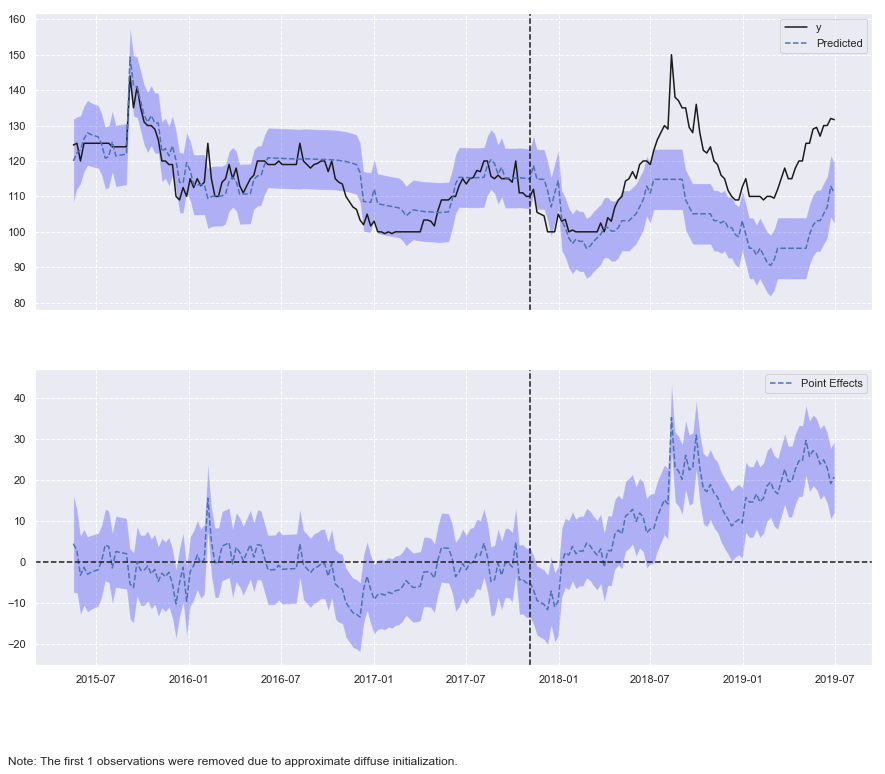

In [17]:
# Set intervention date as the week of Nov 5, 2017

pre_period = ['2015-05-10', '2017-11-05']
post_period = ['2017-11-12', '2019-06-30']

ci = CausalImpact(median_price2, pre_period, post_period)
print(ci.summary())

ci.plot(panels=['original', 'pointwise'], figsize=(15, 12))



In [9]:
infer_df1 = ci.inferences

infer_df1.to_csv('../data/causalimpact_infer_nov52017_median.csv')

infer_df1.head()

post_cum_y       preds  post_preds  post_preds_lower  \
2015-05-10         NaN  117.027890         NaN               NaN   
2015-05-17         NaN  119.999999         NaN               NaN   
2015-05-24         NaN  122.250715         NaN               NaN   
2015-05-31         NaN  123.168114         NaN               NaN   
2015-06-07         NaN  126.268005         NaN               NaN   

            post_preds_upper   preds_lower   preds_upper  post_cum_pred  \
2015-05-10               NaN -17473.514078  17707.569857            NaN   
2015-05-17               NaN    108.162132    131.837867            NaN   
2015-05-24               NaN    111.997734    132.503696            NaN   
2015-05-31               NaN    113.500487    132.835741            NaN   
2015-06-07               NaN    116.906375    135.629635            NaN   

            post_cum_pred_lower  post_cum_pred_upper  point_effects  \
2015-05-10                  NaN                  NaN       2.972110   
2015-05-17                  NaN                  NaN       4.500001   
2015-05-24                  NaN                  NaN       2.749285   
2015-05-31                  NaN                  NaN      -3.168114   
2015-06-07                  NaN                  NaN      -1.268005   

            point_effects_lower  point_effects_upper  post_cum_effects  \
2015-05-10        -17587.569857         17593.514078               NaN   
2015-05-17            -7.337867            16.337868               NaN   
2015-05-24            -7.503696            13.002266               NaN   
2015-05-31           -12.835741             6.499513               NaN   
2015-06-07           -10.629635             8.093625               NaN   

            post_cum_effects_lower  post_cum_effects_upper  
2015-05-10                     NaN                     NaN  
2015-05-17                     NaN                     NaN  
2015-05-24                     NaN                     NaN  
2015-05-31                     NaN                     NaN  
2015-06-07                     NaN                     NaN

In [10]:
print(ci.summary(output='report'))


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 115.6. By contrast, in the absence of an
intervention, we would have expected an average response of 103.4.
The 95% interval of this counterfactual prediction is [101.5, 105.2].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 12.2 with a 95% interval of
[10.4, 14.1]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 9943.6.
By contrast, had the intervention not taken place, we would have expected
a sum of 8890.9. The 95% interval of this prediction is [8726.8, 9049.1].


The above results are given in terms of absolute numbers. In relative
terms, the response variable 

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    117.2              8905.1
Prediction (s.d.)         101.0 (1.0)        7679.8 (76.6)
95% CI                    [99.1, 103.1]      [7535.3, 7835.4]

Absolute effect (s.d.)    16.1 (1.0)         1225.3 (76.6)
95% CI                    [14.1, 18.0]       [1069.7, 1369.8]

Relative effect (s.d.)    16.0% (1.0%)       16.0% (1.0%)
95% CI                    [13.9%, 17.8%]     [13.9%, 17.8%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


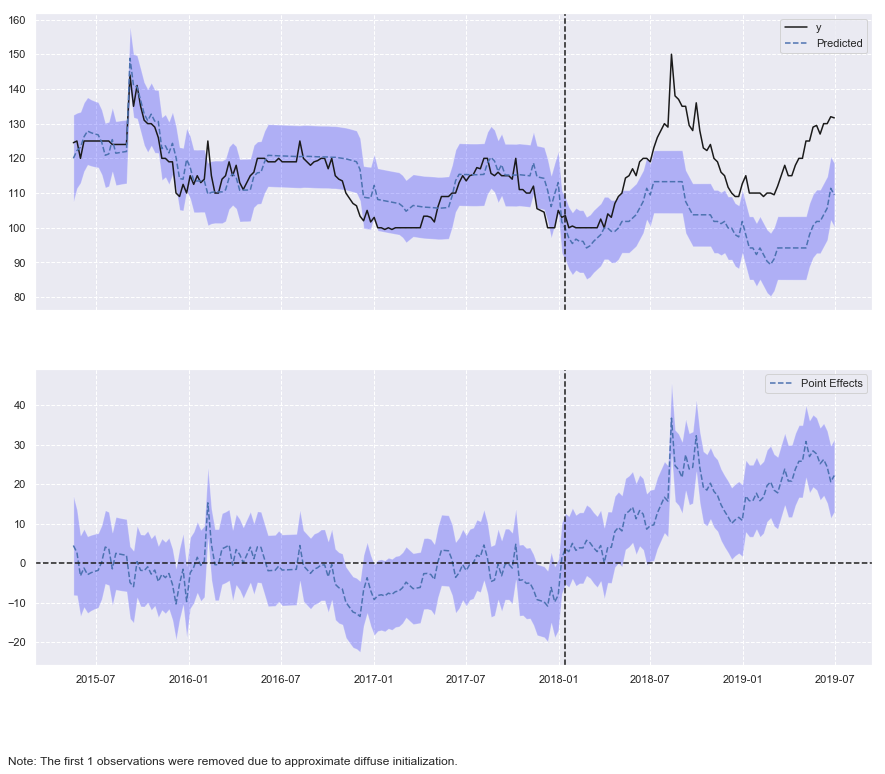

In [11]:
# set the intervention date as the week of Jan 14, 2018

pre_period = ['2015-05-10', '2018-01-14']
post_period = ['2018-01-21', '2019-06-30']

ci = CausalImpact(median_price2, pre_period, post_period)
print(ci.summary())

ci.plot(panels=['original', 'pointwise'], figsize=(15, 12))


In [12]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 117.2. By contrast, in the absence of an
intervention, we would have expected an average response of 101.0.
The 95% interval of this counterfactual prediction is [99.1, 103.1].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 16.1 with a 95% interval of
[14.1, 18.0]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 8905.1.
By contrast, had the intervention not taken place, we would have expected
a sum of 7679.8. The 95% interval of this prediction is [7535.3, 7835.4].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s

In [13]:
infer_df2 = ci.inferences

infer_df2.to_csv('../data/causalimpact_infer_jan142018_median.csv')

infer_df2.head()

post_cum_y       preds  post_preds  post_preds_lower  \
2015-05-10         NaN  116.318048         NaN               NaN   
2015-05-17         NaN  119.999999         NaN               NaN   
2015-05-24         NaN  122.250667         NaN               NaN   
2015-05-31         NaN  123.168018         NaN               NaN   
2015-06-07         NaN  126.194401         NaN               NaN   

            post_preds_upper   preds_lower   preds_upper  post_cum_pred  \
2015-05-10               NaN -17880.077169  18112.713265            NaN   
2015-05-17               NaN    107.465728    132.534270            NaN   
2015-05-24               NaN    111.394596    133.106739            NaN   
2015-05-31               NaN    112.931804    133.404232            NaN   
2015-06-07               NaN    116.282250    136.106553            NaN   

            post_cum_pred_lower  post_cum_pred_upper  point_effects  \
2015-05-10                  NaN                  NaN       3.681952   
2015-05-17                  NaN                  NaN       4.500001   
2015-05-24                  NaN                  NaN       2.749333   
2015-05-31                  NaN                  NaN      -3.168018   
2015-06-07                  NaN                  NaN      -1.194401   

            point_effects_lower  point_effects_upper  post_cum_effects  \
2015-05-10        -17992.713265         18000.077169               NaN   
2015-05-17            -8.034270            17.034272               NaN   
2015-05-24            -8.106739            13.605404               NaN   
2015-05-31           -13.404232             7.068196               NaN   
2015-06-07           -11.106553             8.717750               NaN   

            post_cum_effects_lower  post_cum_effects_upper  
2015-05-10                     NaN                     NaN  
2015-05-17                     NaN                     NaN  
2015-05-24                     NaN                     NaN  
2015-05-31                     NaN                     NaN  
2015-06-07                     NaN                     NaN

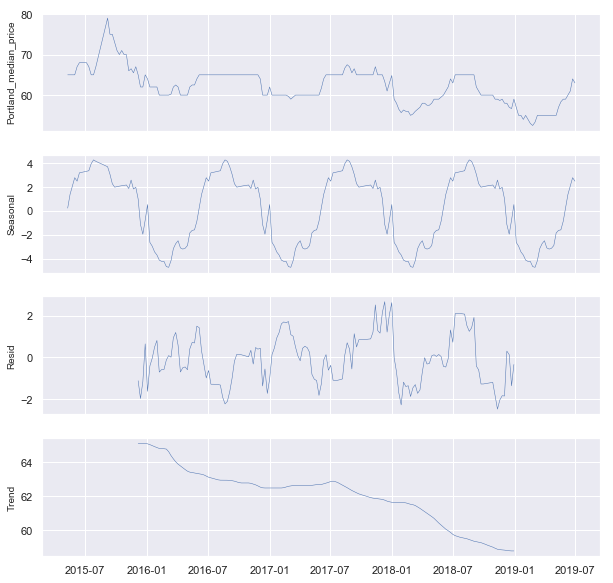

In [14]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(median_price_t.dropna()['Portland_median_price'].values, model='additive', freq= 52)  
price_decomp = median_price_t.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['Portland_median_price','seasonal','resid','trend']

for i, ax in enumerate(axs):
#     ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)

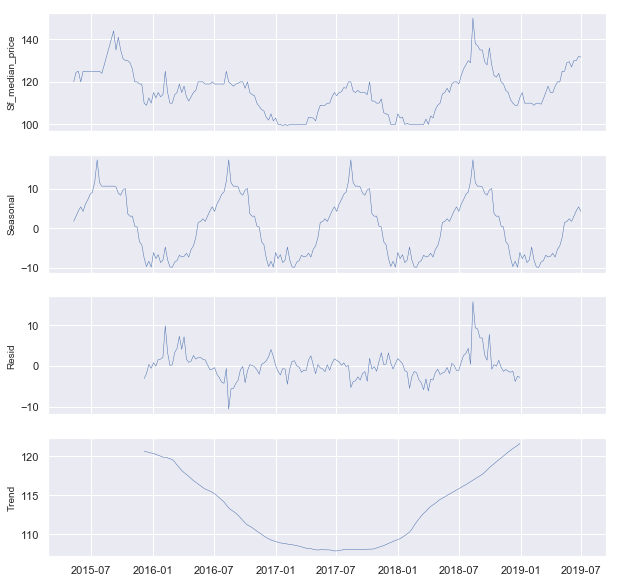

In [15]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(median_price_t.dropna()['SF_median_price'].values, model='additive', freq= 52)  
price_decomp = median_price_t.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['SF_median_price','seasonal','resid','trend']

for i, ax in enumerate(axs):
#     ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)
# ax.vline(x= datetime.date(2018,1,16), color = 'red', linestyle='--',label='SF Regulation Compliance Deadline')